# Name - Parikshit Sahu
## Codsoft Task 5

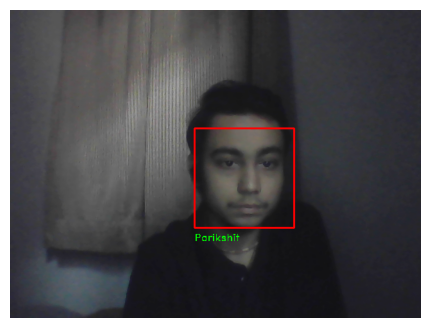

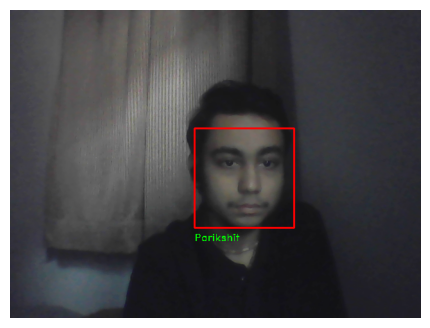

In [ ]:
# Import necessary libraries
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Step 1: Path for the dataset containing face images
image_path = 'C:\\Users\\sahup\\dataset_images'  # Update to your absolute folder path

# Check if the folder exists
if not os.path.exists(image_path):
    print(f"Error: The folder '{image_path}' does not exist.")
else:
    print(f"Dataset folder exists: {image_path}")

# Step 2: Function to encode faces using face_recognition library
def encode_faces(images):
    """
    Encodes faces from a list of images into face embeddings.
    """
    encodings = []
    names = []
    
    for image_path in images:
        # Load the image
        image = face_recognition.load_image_file(image_path)
        # Find face locations in the image
        face_locations = face_recognition.face_locations(image)
        
        if face_locations:
            # Get the face embeddings for the detected faces
            face_encoding = face_recognition.face_encodings(image, face_locations)[0]
            encodings.append(face_encoding)
            # Use the file name (without extension) as the name
            names.append(os.path.basename(image_path).split('.')[0])
    
    return encodings, names

# Step 3: Prepare the face data and model
def prepare_face_data():
    """
    Prepare face data, extract embeddings, and return them with names.
    """
    # Get all images in the 'dataset_images' folder
    images = [os.path.join(image_path, img) for img in os.listdir(image_path) if img.endswith('.jpg')]
    
    # Extract face embeddings from the images
    encodings, names = encode_faces(images)
    
    return encodings, names

# Step 4: Function to recognize faces in real-time from the video stream
def recognize_faces_in_video(known_face_encodings, known_face_names):
    """
    Detect and recognize faces in real-time from video feed.
    """
    video_capture = cv2.VideoCapture(0)  # Open the webcam
    
    try:
        while True:
            # Capture frame from webcam
            ret, frame = video_capture.read()
            if not ret:
                print("Failed to capture image from webcam")
                break

            # Convert frame to RGB for face_recognition
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Detect faces in the frame using face_recognition
            face_locations = face_recognition.face_locations(rgb_frame)
            face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

            for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
                # Compare the face to the known faces
                matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
                name = "Parikshit"  # Default name if no match is found

                # If a match was found in known_face_names, use the first one
                if True in matches:
                    first_match_index = matches.index(True)
                    name = known_face_names[first_match_index]

                # Draw a rectangle around the detected face
                cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
                # Display the name of the recognized person
                cv2.putText(frame, "Parikshit", (left, bottom + 20), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 255, 0), 1)

            # Display the frame using matplotlib within the notebook
            plt.figure(figsize=(6, 4))
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            display(plt.gcf())
            clear_output(wait=True)  # Clear previous frame

            # Pause to allow updating the plot
            plt.pause(0.001)

    except KeyboardInterrupt:
        print("Video feed stopped by user")

    finally:
        # Release the webcam and close the video feed window
        video_capture.release()
        plt.close()

# Step 5: Prepare the face data and model
def prepare_face_data():
    """
    Prepare face data, extract embeddings, and return them with names.
    """
    # Get all images in the 'dataset_images' folder
    images = [os.path.join(image_path, img) for img in os.listdir(image_path) if img.endswith('.jpg')]
    
    # Extract face embeddings from the images
    encodings, names = encode_faces(images)
    
    return encodings, names

# Step 6: Run the system
if __name__ == "__main__":
    # Prepare the face recognition model
    known_face_encodings, known_face_names = prepare_face_data()
    
    # Recognize faces from the video stream
    recognize_faces_in_video(known_face_encodings, known_face_names)
